### 1. Loading your friend's data into a dictionary
- creating a dictionary from raw data
- use our friend's data to create a dictionary containing years and average movie lengths.  
- print and inspect the dictionary to ensure it was created correctly.


1. ` years = list(2011+i for i in range(2020-2011+1))`
1. `movie_dict = {'years':years,'durations':durations}`

In [2]:
# Create a list of the years   
years = list(2011+i for i in range(2020-2011+1))
# Create a list of duration of the average movie length
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with two new keys and the two lists as values
movie_dict = {'years':years,'durations':durations}

# Print the dictionary
print(movie_dict)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


### 2. Creating a DataFrame from a dictionary
- Import the pandas library under its usual alias. 
- Convert dictionary movie_dict to a pandas DataFrame
- Inspect our DataFrame to ensure it was created correctly. Let's perform these steps now.

In [3]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


### 3. A visual inspection of our data
- follow up on our friend's assertion that movie lengths have been decreasing over time. 
- visualization of the data: a line plot using matploblib.pyplot given that the data is continuous

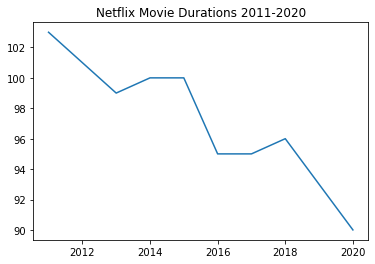

In [4]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(durations_df['years'], durations_df['durations'])

# Create a title
plt.title('Netflix Movie Durations 2011-2020')

# Show the plot
plt.show()

### 4. Loading the rest of the data from a CSV
Well, it looks like there is something to the idea that movie lengths have decreased over the past ten years!

There are a few questions about this trend that we are currently unable to answer, including:

    What does this trend look like over a longer period of time?
    Is this explainable by something like the genre of entertainment?

Further explorations using the rest of the data from a CSV

- Upon asking our friend for the original CSV they used to perform their analyses, they gladly oblige and send it. 
- We now have access to the CSV file, available at the path "datasets/netflix_data.csv". 
- Let's create another DataFrame, this time with all of the data. We will inspect it by printing only the first five rows.

In [51]:
import os as os
current_dir = os.getcwd()
# print(type(current_dir))

# join directory, sub-directory, and file name 
file_path = os.path.join(current_dir, 'datasets', 'netflix_data.csv')
print(file_path)

# Read in the CSV as a DataFrame
with open(file_path, mode ='r',encoding="utf-8") as my_file: # https://github.com/mwouts/jupytext/issues/770
    netflix_df = pd.read_csv(my_file, index_col = None)

# Print the first five rows of the DataFrame
netflix_df.head(5)

D:\datacamp\Project\P1 Investigating Netflix Movies and Guest Stars in The Office\datasets\netflix_data.csv


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"""September 25, 2021""",2020,PG-13,90 min,Documentaries,"""As her father nears the end of his life, film..."
1,TV Show,Blood & Water,NaN,"""Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"""September 24, 2021""",2021,TV-MA,2 Seasons,"""International TV Shows, TV Dramas, TV Mysteries""","""After crossing paths at a party, a Cape Town ..."
2,TV Show,Ganglands,Julien Leclercq,"""Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,"""September 24, 2021""",2021,TV-MA,1 Season,"""Crime TV Shows, International TV Shows, TV Ac...","""To protect his family from a powerful drug lo..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"""September 24, 2021""",2021,TV-MA,1 Season,"""Docuseries, Reality TV""","""Feuds, flirtations and toilet talk go down am..."
4,TV Show,Kota Factory,NaN,"""Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"""September 24, 2021""",2021,TV-MA,2 Seasons,"""International TV Shows, Romantic TV Shows, TV...","""In a city of coaching centers known to train ..."


### 5. Filtering for movies!

- Subset the DataFrame for type of only "Movie", not include TV shows
- don't need information from all of the columns 
- create a new DataFrame netflix_movies containing only title, country, genre, release_year, and duration.

Let's put our data subsetting skills to work!

In [148]:
# Subset the DataFrame for type "Movie"

netflix_df_movies_only = netflix_df[netflix_df['type'].isin(['Movie'])]
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']
# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[['title', 'country', 'listed_in','release_year','duration']]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head(5)

,title,country,listed_in,release_year,duration
0,Dick Johnson Is Dead,United States,Documentaries,2020,90 min
6,My Little Pony: A New Generation,NaN,Children & Family Movies,2021,91 min
7,Sankofa,"""United States, Ghana, Burkina Faso, United Ki...","""Dramas, Independent Movies, International Mov...",1993,125 min
9,The Starling,United States,"""Comedies, Dramas""",2021,104 min
12,Je Suis Karl,"""Germany, Czech Republic""","""Dramas, International Movies""",2021,127 min


### 6. Cleaning columns: dtype and astype
The dataset is not same as the offical project and need to be cleaned before analysis
- check column type and change to category

In [133]:
# check column data type: dtypes
print(netflix_movies_col_subset['listed_in'].dtypes)

# in-line change of the column type without a warning error
pd.options.mode.chained_assignment = None  # default='warn' # surpress the warning
netflix_movies_col_subset.loc[:,'listed_in']=netflix_movies_col_subset['listed_in'].astype('category')

assert  netflix_movies_col_subset['listed_in'].dtypes == 'category'
print(netflix_movies_col_subset['listed_in'].dtypes)

object
category


### 6.1 Cleaning columns: special characters
- remove all special characters from each cell

In [134]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]

for char in spec_chars:
    netflix_movies_col_subset['listed_in'] = netflix_movies_col_subset['listed_in'].str.replace(char, '')
    
print(netflix_movies_col_subset.loc[7,'listed_in'])
print(netflix_movies_col_subset.loc[6,'listed_in'])

Dramas Independent Movies International Movies
Children  Family Movies


### 6.2 Cleaning columns: extract first word
- str.split()

In [135]:
import re
netflix_movies_col_subset['genre_extract'] = netflix_movies_col_subset['listed_in'].str.split().str[0]
# test = netflix_movies_col_subset.loc[6,'listed_in'].split()[0]
# print(test)

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head(5)

,title,country,listed_in,release_year,duration,genre_extract
0,Dick Johnson Is Dead,United States,Documentaries,2020,90 min,Documentaries
6,My Little Pony: A New Generation,NaN,Children Family Movies,2021,91 min,Children
7,Sankofa,"""United States, Ghana, Burkina Faso, United Ki...",Dramas Independent Movies International Movies,1993,125 min,Dramas
9,The Starling,United States,Comedies Dramas,2021,104 min,Comedies
12,Je Suis Karl,"""Germany, Czech Republic""",Dramas International Movies,2021,127 min,Dramas


In [79]:
print(netflix_movies_col_subset.loc[7,'listed_in'])

"Dramas, Independent Movies, International Movies"


### 6.3 Clearning columns: df.rename
- change column title from listed_in to genre: df.rename()

In [136]:
netflix_movies_col_subset.rename(columns = {'genre_extract':'genre'}, inplace =True)

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head(5)

,title,country,listed_in,release_year,duration,genre
0,Dick Johnson Is Dead,United States,Documentaries,2020,90 min,Documentaries
6,My Little Pony: A New Generation,NaN,Children Family Movies,2021,91 min,Children
7,Sankofa,"""United States, Ghana, Burkina Faso, United Ki...",Dramas Independent Movies International Movies,1993,125 min,Dramas
9,The Starling,United States,Comedies Dramas,2021,104 min,Comedies
12,Je Suis Karl,"""Germany, Czech Republic""",Dramas International Movies,2021,127 min,Dramas


### 7 Extract duration

- check type of a column - duration: object to int64
- remove unit "min" from  duration,  and numerical from string
- convert from object to int64, convert the string into number

In [137]:
# check column data type
netflix_movies_col_subset.info()

netflix_movies_col_subset['duration'] = netflix_movies_col_subset['duration'].str.strip(' min')
netflix_movies_col_subset['duration'] = netflix_movies_col_subset['duration'].astype('int')

# verify that duration is now an integer, return nothing if pass, show AssertionError if not pass
assert netflix_movies_col_subset['duration'].dtype == 'int'

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1183 entries, 0 to 1817
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1183 non-null   object
 1   country       950 non-null    object
 2   listed_in     1183 non-null   object
 3   release_year  1183 non-null   int64 
 4   duration      1183 non-null   object
 5   genre         1183 non-null   object
dtypes: int64(1), object(5)
memory usage: 64.7+ KB


,title,country,listed_in,release_year,duration,genre
0,Dick Johnson Is Dead,United States,Documentaries,2020,90,Documentaries
6,My Little Pony: A New Generation,NaN,Children Family Movies,2021,91,Children
7,Sankofa,"""United States, Ghana, Burkina Faso, United Ki...",Dramas Independent Movies International Movies,1993,125,Dramas
9,The Starling,United States,Comedies Dramas,2021,104,Comedies
12,Je Suis Karl,"""Germany, Czech Republic""",Dramas International Movies,2021,127,Dramas


### 8. Creating a scatter plot

Okay, now we have read in the raw data, selected rows of movies, and have limited our DataFrame to our columns of interest. Let's try visualizing the data again to inspect the data over a longer range of time.

- try a scatter plot to plot the year of release on the x-axis and the movie duration on the y-axis.

Note: Although not taught in Intermediate Python, we have provided you the code fig = plt.figure(figsize=(12,8)) to increase the size of the plot (to help you see the results), as well as to assist with testing. For more information on how to create or work with a matplotlib figure, refer to the documentation.

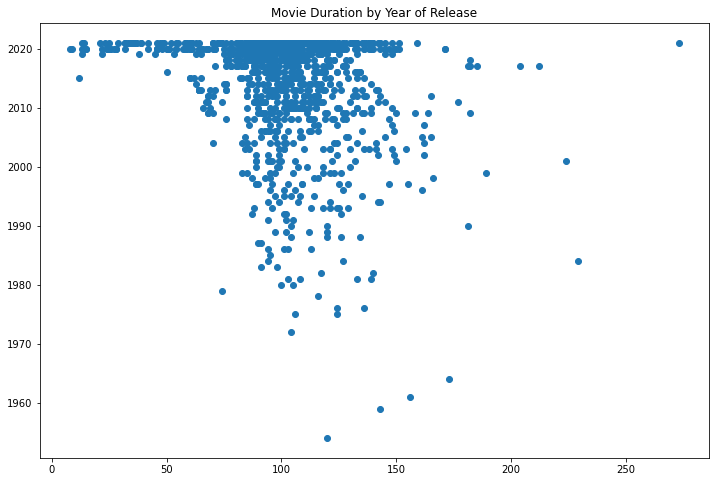

In [138]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset['duration'],netflix_movies_col_subset['release_year'])

# Create a title
plt.title('Movie Duration by Year of Release')

# Show the plot
plt.show()

### 9. Further filtering and digging deeper
- Some of these films are under an hour long! Let's filter our DataFrame for movies with a duration under 60 minutes 
This might give us some insight into what is dragging down the average.

In [139]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration']<60]

# Print the first 20 rows of short_movies
short_movies.head(20)

,title,country,listed_in,release_year,duration,genre
45,My Heroes Were Cowboys,NaN,Documentaries,2021,23,Documentaries
71,A StoryBots Space Adventure,NaN,Children Family Movies,2021,13,Children
77,Little Singham - Black Shadow,NaN,Children Family Movies Comedies,2021,48,Children
279,Monster Hunter: Legends of the Guild,"""United States, Japan""",Action Adventure Anime Features Children Fam...,2021,59,Action
470,Bridgerton - The Afterparty,NaN,Movies,2021,39,Movies
484,Lee Su-geun: The Sense Coach,NaN,StandUp Comedy,2021,46,StandUp
495,Awon Boyz,NaN,Documentaries International Movies,2019,38,Documentaries
560,Audible,NaN,Documentaries Sports Movies,2021,39,Documentaries
694,Aziza,"""Lebanon, Syria""",Comedies Dramas Independent Movies,2019,13,Comedies
695,Besieged Bread,NaN,Dramas International Movies,2015,12,Dramas


### 10.  Marking non-feature films

Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "StandUp", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster.

- We want to mark them with a different color. We are using the basic colors of red, blue, green, and black
- use a loop to generate a list of colors based on the contents of the genre column
- pass this list to our plotting function in a later step to color all non-typical genres in a different color 

In [142]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab,row in netflix_movies_col_subset.iterrows() :
    if row['genre'] == 'Children' :
        colors.append('red')
    elif row['genre'] == 'Documentaries' :
        colors.append('blue')
    elif row['genre'] == 'StandUp' :
        colors.append('green')
    else:
        colors.append('black')
        
# Inspect the first 10 values in your list        
colors[0:10]

['blue',
 'red',
 'black',
 'black',
 'black',
 'red',
 'blue',
 'black',
 'black',
 'red']

### 9. Plotting with color!

- plot with some additional axis labels and a new theme with plt.style.use().

No handles with labels found to put in legend.


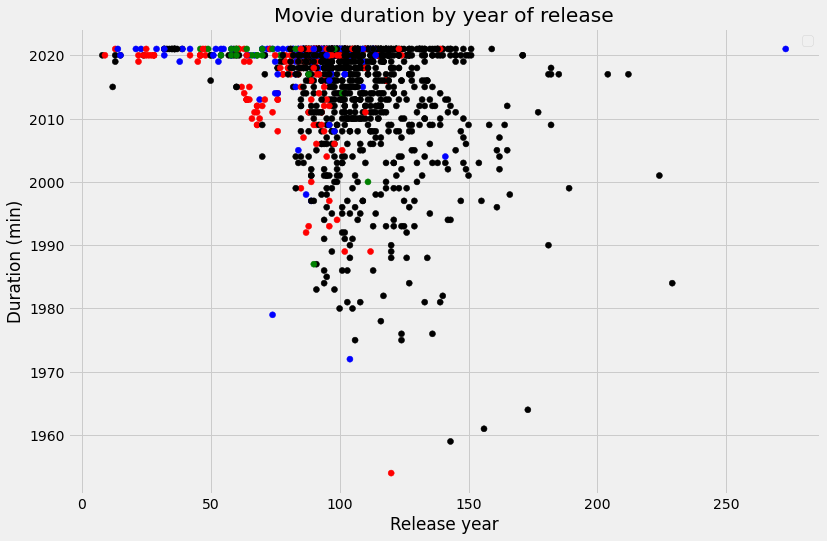

In [144]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['duration'],netflix_movies_col_subset['release_year'],
           c=colors)

# Create a title and axis labels
plt.title('Movie duration by year of release')
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
# plt.legend()

# Show the plot
plt.show()